<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/dchW6D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understand Classification Types

Read about Binary Classification, Multi-class Classification, and Multi-label Classification.
Write a brief explanation of each type with an example.


1. Binary Classification

Definition:

A classification task where each instance is assigned to one of two possible classes.

Example:

Spam Detection: Classify emails as either spam or not spam.

Labels:

0 = Not Spam

1 = Spam

2. Multi-class Classification

Definition:

A classification task where each instance is assigned to one class out of more than two possible classes.

Example:

Handwritten Digit Recognition: Classify images of digits as 0–9 using the MNIST dataset.

Labels:
0, 1, 2, ..., 9 (only one label per image)


3. Multi-label Classification

Definition:

A classification task where each instance can belong to multiple classes at the same time.

Example:

Movie Genre Classification: A movie can belong to multiple genres like Action, Comedy, and Sci-Fi simultaneously.

Labels:

[1, 0, 1, 0, 1] → indicates the movie belongs to Action, not Drama, is Sci-Fi, etc.


# 2. Visualize the dataset using scatter plots to understand the data distribution

X :  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]


y :  [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1

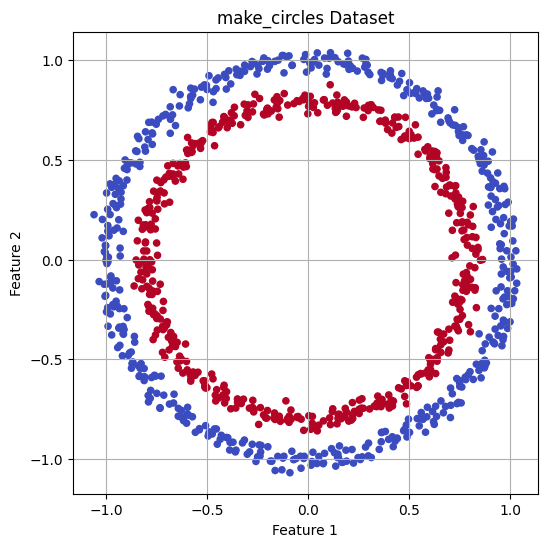

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles

samples = 1000
X, y = make_circles(samples,
                    noise = 0.03,
                    random_state = 42)

print('X : ', X)
print('\n')
print('y : ', y)

# Visualize the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20)
plt.title('make_circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## 3. Build a Basic Neural Network Model

Create a Sequential Model in TensorFlow with one dense layer.

Use Binary Crossentropy as the loss function.

Train the model and check the accuracy.

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')  # Single neuron for binary classification
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)  # Set verbose=1 to see training logs

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4417 - loss: 0.6982  
✅ Test Loss: 0.6958
✅ Test Accuracy: 0.4700


# 4. Improve the Model

Add more layers and neurons to the model.

Train the model for more epochs.

Try different optimizers like Adam instead of SGD.

In [ ]:
# Build a deeper model with more neurons
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model for more epochs
history = model.fit(X_train, y_train, epochs=200, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0096  
✅ Test Loss: 0.0105
✅ Test Accuracy: 1.0000


# 5. Visualize the Decision Boundary

Implement a function plot_decision_boundary() to visualize model predictions.
Plot decision boundaries for different models and compare results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Define a grid of points over the feature space
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Flatten and predict
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = preds.reshape(xx.shape)

    # Plot contour and data points
    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


7813/7813 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


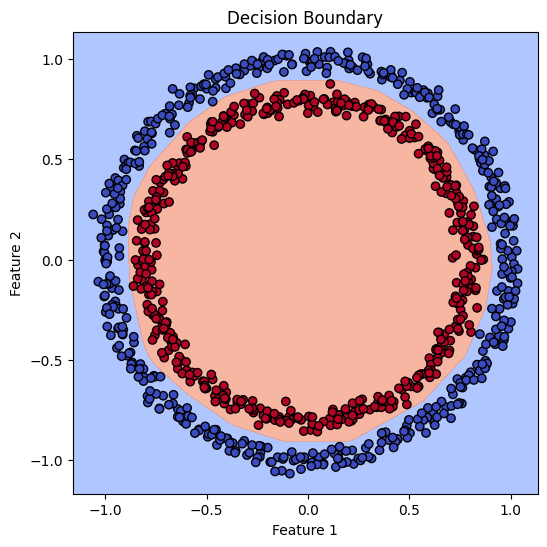

In [ ]:
plot_decision_boundary(model, X, y)

# 6. Incorporate Activation Functions

Explore ReLU and Sigmoid activation functions.

Modify the neural network to include these activation functions.

Train the new model and compare performance.

In [ ]:
# Build model with ReLU and Sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),  # Hidden layer with ReLU
    tf.keras.layers.Dense(16, activation='relu'),                    # Another hidden layer with ReLU
    tf.keras.layers.Dense(1, activation='sigmoid')                   # Output layer with Sigmoid
])

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train model
history = model.fit(X_train, y_train, epochs=200, verbose=0)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0129  
✅ Test Loss: 0.0124
✅ Test Accuracy: 1.0000


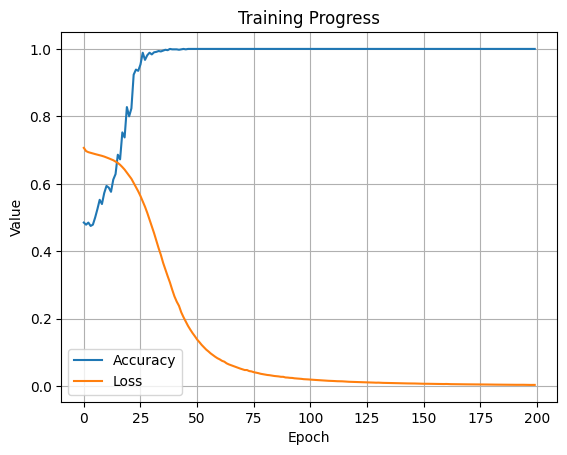

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Progress')
plt.legend()
plt.grid(True)
plt.show()


7813/7813 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


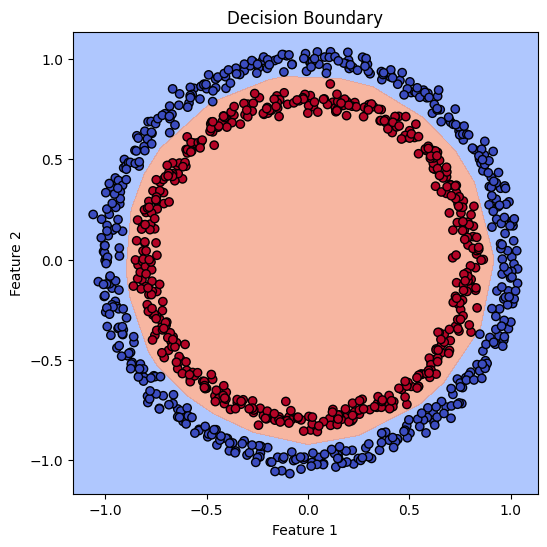

In [ ]:
plot_decision_boundary(model, X, y)

A simple model with a single dense layer struggled with the circular data (accuracy ~47%).

Deeper models with more layers and ReLU activation functions learned non-linear decision boundaries and achieved 100% accuracy.